In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/y_test.csv
/kaggle/input/fashionmnist/x_test.csv
/kaggle/input/fashionmnist/y_train.csv
/kaggle/input/fashionmnist/x_train.csv


In [130]:
!pip install visualkeras

In [131]:
import warnings
warnings.filterwarnings(action='ignore')
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN,KMeans
import visualkeras

In [132]:
x_train = pd.read_csv('/kaggle/input/fashionmnist/x_train.csv')
y_train = pd.read_csv('/kaggle/input/fashionmnist/y_train.csv')
x_test = pd.read_csv('/kaggle/input/fashionmnist/x_test.csv')
y_test = pd.read_csv('/kaggle/input/fashionmnist/y_test.csv')
print(x_train.shape)
x_train.head

(60000, 784)


<bound method NDFrame.head of        0  1  2  3  4  5  6  7   8   9  ...  774  775  776  777  778  779  780  \
0      0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
1      0  0  0  0  0  1  0  0   0   0  ...  119  114  130   76    0    0    0   
2      0  0  0  0  0  0  0  0   0  22  ...    0    0    1    0    0    0    0   
3      0  0  0  0  0  0  0  0  33  96  ...    0    0    0    0    0    0    0   
4      0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
...   .. .. .. .. .. .. .. ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...   
59995  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
59996  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
59997  0  0  0  0  0  0  0  0   0   5  ...    0    0    0    0    0    0    0   
59998  0  0  0  0  0  0  0  0   0   0  ...   66   54   50    5    0    1    0   
59999  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0  

### Normalization

In [133]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_train shape: ",x_train.shape)
print("test shape: ",x_test.shape)

x_train shape:  (60000, 784)
test shape:  (10000, 784)


### Reshape

In [134]:
# Reshape
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
print("x_train shape: ",x_train.shape)
print("test shape: ",x_test.shape)

x_train shape:  (60000, 28, 28, 1)
test shape:  (10000, 28, 28, 1)


# Q1: Default Network (Classification with Convolutional Neural Networks) 

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_265 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 13, 13, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_266 (Conv2D)         (None, 11, 11, 32)        9248      
                                                                 
 flatten_55 (Flatten)        (None, 3872)              0         
                                                                 
 dense_75 (Dense)            (None, 5)                 19365     
                                                                 
Total params: 28,933
Trainable params: 28,933
Non-trainable params: 0
_________________________________________________

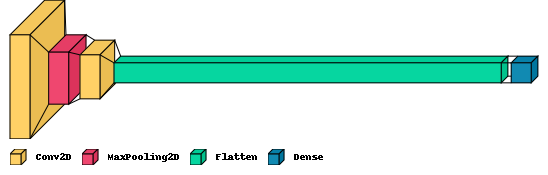

In [135]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation = "softmax"))
model.summary()
dot_img_file = '/kaggle/working/model.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
visualkeras.layered_view(model, legend=True)

In [136]:
from keras.utils import to_categorical 
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

y_train_onehot = to_categorical(y_train, num_classes=5)
y_test_onehot = to_categorical(y_test, num_classes=5)
history = model.fit(x_train, y_train_onehot, epochs=10, validation_data=(x_test, y_test_onehot))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6205 - accuracy: 0.7545 - val_loss: 0.4678 - val_accuracy: 0.8203
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4229 - accuracy: 0.8450 - val_loss: 0.4039 - val_accuracy: 0.8496
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3740 - accuracy: 0.8644 - val_loss: 0.3719 - val_accuracy: 0.8662
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3422 - accuracy: 0.8768 - val_loss: 0.3742 - val_accuracy: 0.8579
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3193 - accuracy: 0.8855 - val_loss: 0.3247 - val_accuracy: 0.8811
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3020 - accuracy: 0.8910 - val_loss: 0.3231 - val_accuracy: 0.8809
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2873 - accuracy: 0.8968 - val_loss: 0.3031 - val_accuracy:

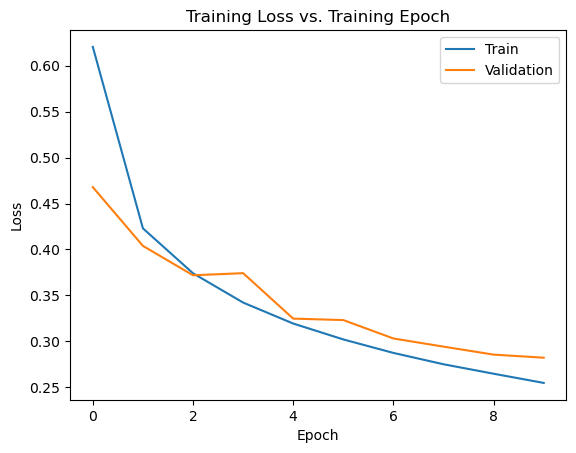

In [137]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training Loss vs. Training Epoch')
plt.legend(loc='upper right')

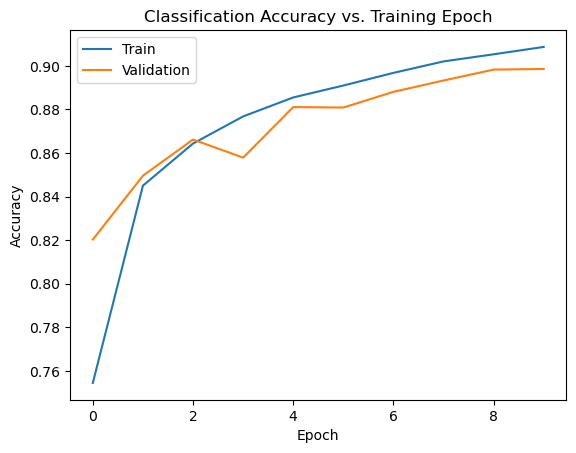

In [138]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Classification Accuracy vs. Training Epoch')
plt.legend(loc='upper left')

In [139]:
print(model.evaluate(x_test, y_test_onehot))

313/313 [==============================] - 1s 3ms/step - loss: 0.2822 - accuracy: 0.8986
[0.28215330839157104, 0.8985999822616577]


In [140]:
# Predict the values from the validation dataset
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_pred
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2000
           1       0.98      0.92      0.95      1000
           2       0.86      0.90      0.88      2000
           3       0.92      0.97      0.95      2000
           4       0.87      0.91      0.89      3000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



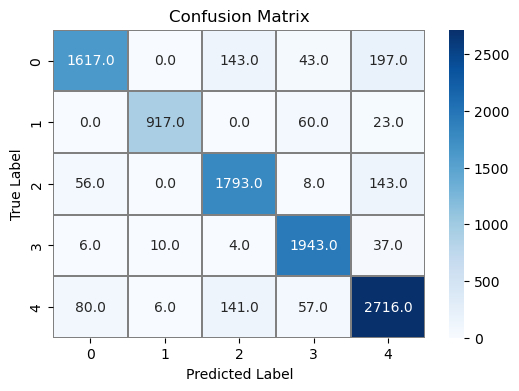

In [141]:
# plot the confusion matrix
f,ax = plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Q2 & Q3: Your Own Network & Result Analysis

### Model 1 - Variation of filters with more convolution layers

<PIL.Image.Image image mode=RGBA size=389x175 at 0x79873ED92610>


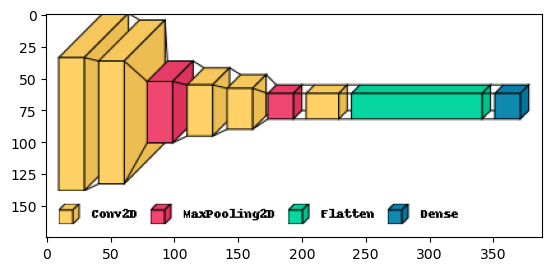

In [142]:
model1 = models.Sequential()

model1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(5, activation='softmax'))
print(visualkeras.layered_view(model1, legend=True))
plt.imshow(visualkeras.layered_view(model1, legend=True))

### Model 2 - With activation function - LeakyReLU & addition of Dropout

In [143]:
model2 = models.Sequential()

model2.add(layers.Conv2D(64, (3, 3), activation='LeakyReLU', input_shape=(28, 28, 1)))
model2.add(layers.Conv2D(64, (3, 3), activation='LeakyReLU'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (3, 3), activation='LeakyReLU'))
model2.add(layers.Conv2D(128, (3, 3), activation='LeakyReLU'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(256, (3, 3), activation='LeakyReLU'))

model2.add(layers.Flatten())
model2.add(layers.Dropout(.2))
model2.add(layers.Dense(5, activation='softmax'))

### Model 3 - With activation function - Sigmoid & addition of Dropout

In [144]:
model3 = models.Sequential()

model3.add(layers.Conv2D(64, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model3.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model3.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(256, (3, 3), activation='sigmoid'))
model3.add(layers.Flatten())
model3.add(layers.Dropout(.3))
model3.add(layers.Dense(5, activation='softmax'))

### Model 4 - With activation function - tanh & addition of Dropout

In [145]:
model4 = models.Sequential()

model4.add(layers.Conv2D(64, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
model4.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model4.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(256, (3, 3), activation='tanh'))
model4.add(layers.Flatten())
model4.add(layers.Dropout(.5))
model4.add(layers.Dense(5, activation='softmax'))

### Model 5 - With activation function - tanh & using Adam optimizer

In [146]:
model5 = models.Sequential()

model5.add(layers.Conv2D(64, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
model5.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model5.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(256, (3, 3), activation='tanh'))
model5.add(layers.Flatten())
model5.add(layers.Dropout(.5))
model5.add(layers.Dense(5, activation='softmax'))

### Model 6 - With activation function - LeakyReLU & using Adam optimizer

In [147]:
model6 = models.Sequential()

model6.add(layers.Conv2D(64, (3, 3), activation='LeakyReLU', input_shape=(28, 28, 1)))
model6.add(layers.Conv2D(64, (3, 3), activation='LeakyReLU'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(128, (3, 3), activation='LeakyReLU'))
model6.add(layers.Conv2D(128, (3, 3), activation='LeakyReLU'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(256, (3, 3), activation='LeakyReLU'))
model6.add(layers.Flatten())
model6.add(layers.Dropout(.5))
model6.add(layers.Dense(5, activation='softmax'))

### Model 7 - With activation function - LeakyReLU & variation of kernel size

In [148]:
model7 = models.Sequential()

model7.add(layers.Conv2D(64, (2, 2), activation='LeakyReLU', input_shape=(28, 28, 1)))
model7.add(layers.Conv2D(64, (2, 2), activation='LeakyReLU'))
model7.add(layers.MaxPooling2D((2, 2)))

model7.add(layers.Conv2D(128, (2, 2), activation='LeakyReLU'))
model7.add(layers.Conv2D(128, (2, 2), activation='LeakyReLU'))
model7.add(layers.MaxPooling2D((2, 2)))

model7.add(layers.Conv2D(256, (2, 2), activation='LeakyReLU'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Flatten())
model7.add(layers.Dropout(.5))
model7.add(layers.Dense(5, activation='LeakyReLU'))
model7.add(layers.Dense(5, activation='softmax'))

### Model 8 - With activation function - LeakyReLU & variation of kernel size & addition of EarlyStopping

In [149]:
model8 = models.Sequential()

model8.add(layers.Conv2D(128, (2, 2), activation='LeakyReLU', input_shape=(28, 28, 1)))
model8.add(layers.Conv2D(128, (2, 2), activation='LeakyReLU'))
model8.add(layers.MaxPooling2D((2, 2)))

model8.add(layers.Conv2D(256, (2, 2), activation='LeakyReLU'))
model8.add(layers.Conv2D(256, (2, 2), activation='LeakyReLU'))
model8.add(layers.MaxPooling2D((2, 2)))

model8.add(layers.Conv2D(512, (2, 2), activation='LeakyReLU'))
model8.add(layers.Conv2D(512, (2, 2), activation='LeakyReLU'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Flatten())
model8.add(layers.Dropout(.5))
model8.add(layers.Dense(5, activation='LeakyReLU'))
model8.add(layers.Dense(5, activation='softmax'))

### Model 9 - Multiple activation functions - relu, LeakyReLU & tanh

In [150]:
model9 = models.Sequential()

model9.add(layers.Conv2D(128, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model9.add(layers.Conv2D(128, (2, 2), activation='relu'))
model9.add(layers.MaxPooling2D((2, 2)))

model9.add(layers.Conv2D(256, (2, 2), activation='LeakyReLU'))
model9.add(layers.Conv2D(256, (2, 2), activation='LeakyReLU'))
model9.add(layers.MaxPooling2D((2, 2)))

model9.add(layers.Conv2D(512, (2, 2), activation='tanh'))
model9.add(layers.Conv2D(512, (2, 2), activation='tanh'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Flatten())
model9.add(layers.Dropout(.3))
model9.add(layers.Dense(5, activation='LeakyReLU'))
model9.add(layers.Dense(5, activation='softmax'))

### Model 10 - With activation function - LeakyReLU & varying the order of layers

In [151]:
model10 = models.Sequential()

model10.add(layers.Conv2D(128, (2, 2), activation='LeakyReLU', input_shape=(28, 28, 1)))
model10.add(layers.Conv2D(128, (2, 2), activation='LeakyReLU'))
model10.add(layers.Conv2D(256, (2, 2), activation='LeakyReLU'))
model10.add(layers.Conv2D(256, (2, 2), activation='LeakyReLU'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.MaxPooling2D((2, 2)))

model10.add(layers.Flatten())
model10.add(layers.Dropout(.5))
model10.add(layers.Dense(5, activation='LeakyReLU'))
model10.add(layers.Dense(5, activation='softmax'))

model10.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_314 (Conv2D)         (None, 27, 27, 128)       640       
                                                                 
 conv2d_315 (Conv2D)         (None, 26, 26, 128)       65664     
                                                                 
 conv2d_316 (Conv2D)         (None, 25, 25, 256)       131328    
                                                                 
 conv2d_317 (Conv2D)         (None, 24, 24, 256)       262400    
                                                                 
 max_pooling2d_152 (MaxPooli  (None, 12, 12, 256)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_153 (MaxPooli  (None, 6, 6, 256)        0         
 ng2D)                                               

Variation of filters & addition of layers
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_267 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 conv2d_268 (Conv2D)         (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 12, 12, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_269 (Conv2D)         (None, 10, 10, 128)       73856     
                                                                 
 conv2d_270 (Conv2D)         (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_132 (MaxPooli  (None, 4, 4, 128)        0         
 ng2D)     

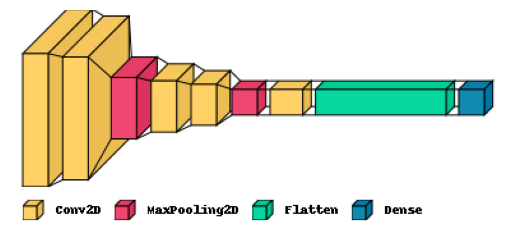

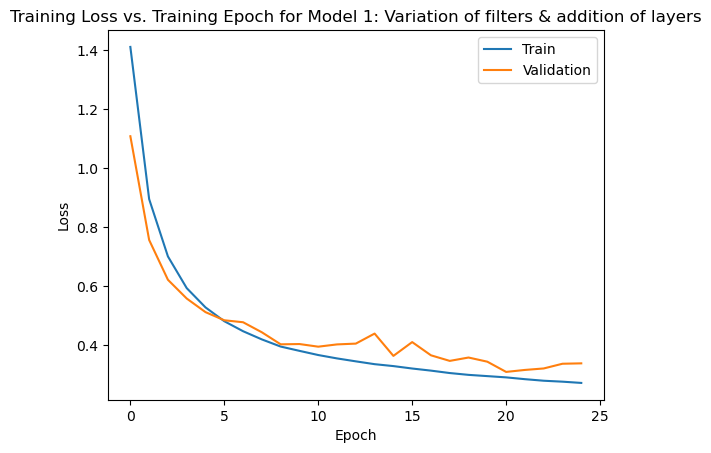

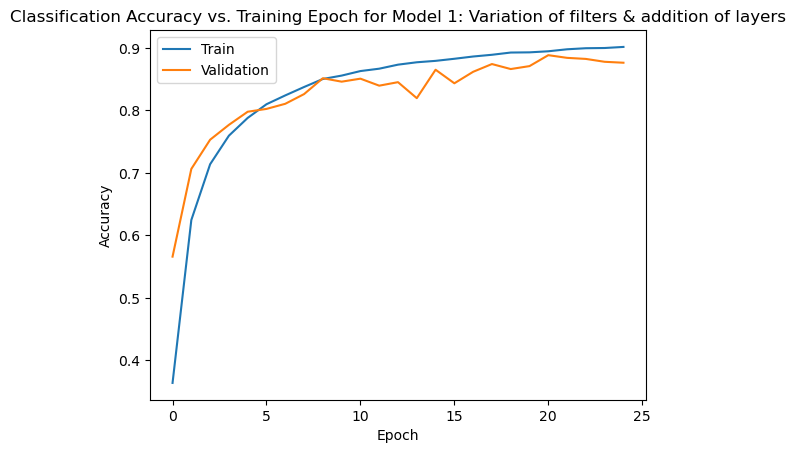

<Figure size 640x480 with 0 Axes>

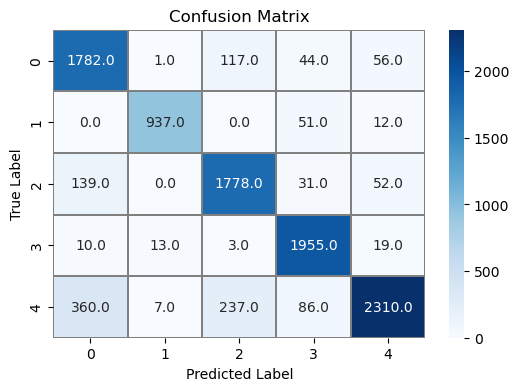

<Figure size 600x300 with 0 Axes>

With activation function - LeakyReLU & addition of Dropout
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_272 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 conv2d_273 (Conv2D)         (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_133 (MaxPooli  (None, 12, 12, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_274 (Conv2D)         (None, 10, 10, 128)       73856     
                                                                 
 conv2d_275 (Conv2D)         (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_134 (MaxPooli  (None, 4, 4, 128)        0    

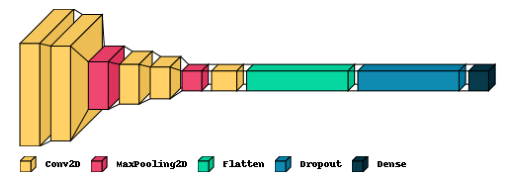

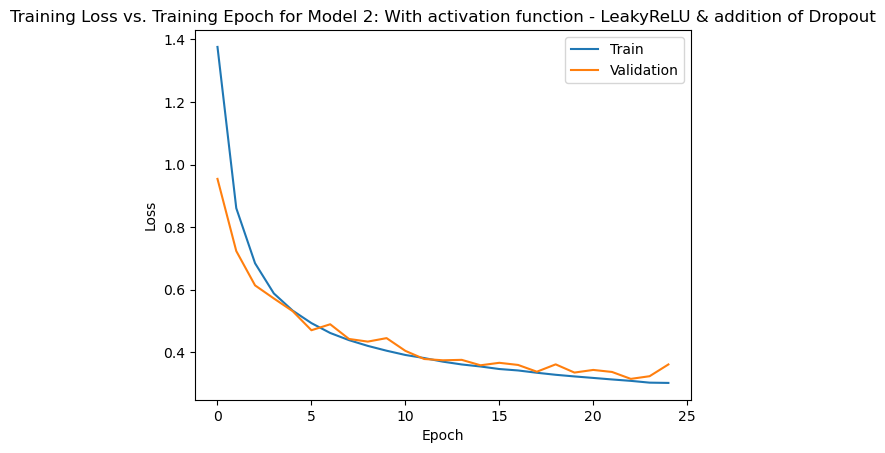

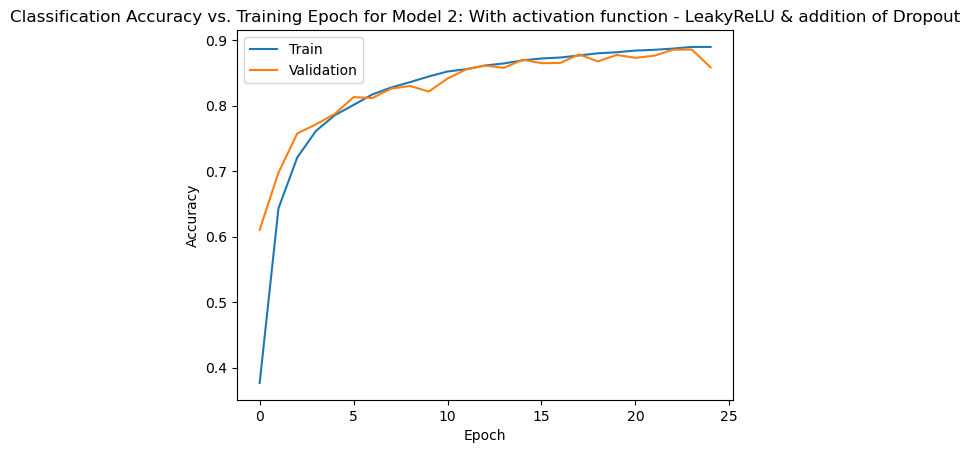

<Figure size 640x480 with 0 Axes>

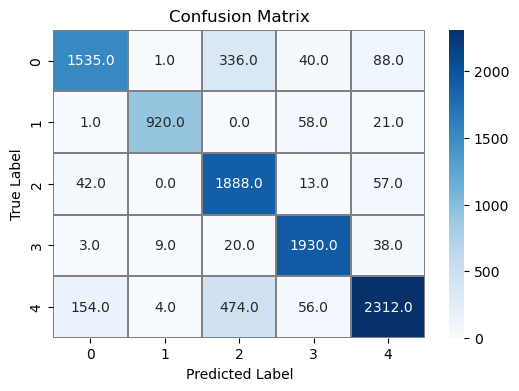

<Figure size 600x300 with 0 Axes>

With activation function - Sigmoid & addition of Dropout
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_277 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 conv2d_278 (Conv2D)         (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_135 (MaxPooli  (None, 12, 12, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_279 (Conv2D)         (None, 10, 10, 128)       73856     
                                                                 
 conv2d_280 (Conv2D)         (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_136 (MaxPooli  (None, 4, 4, 128)        0      

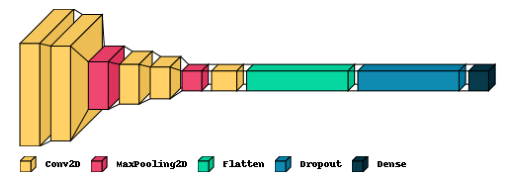

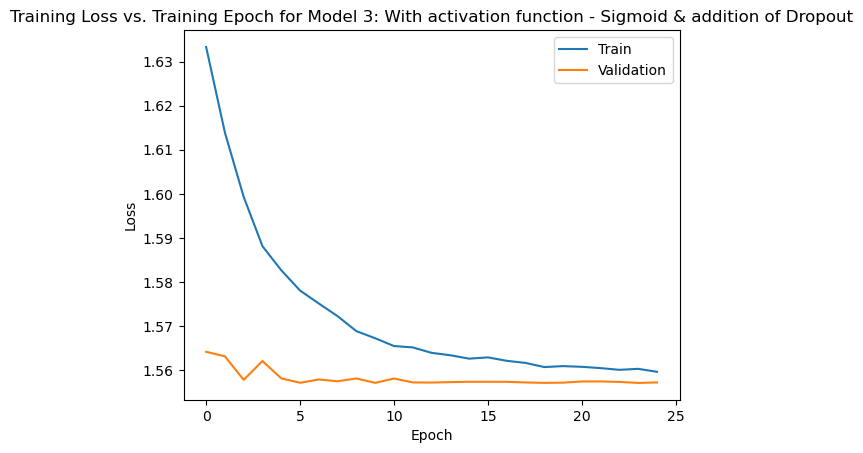

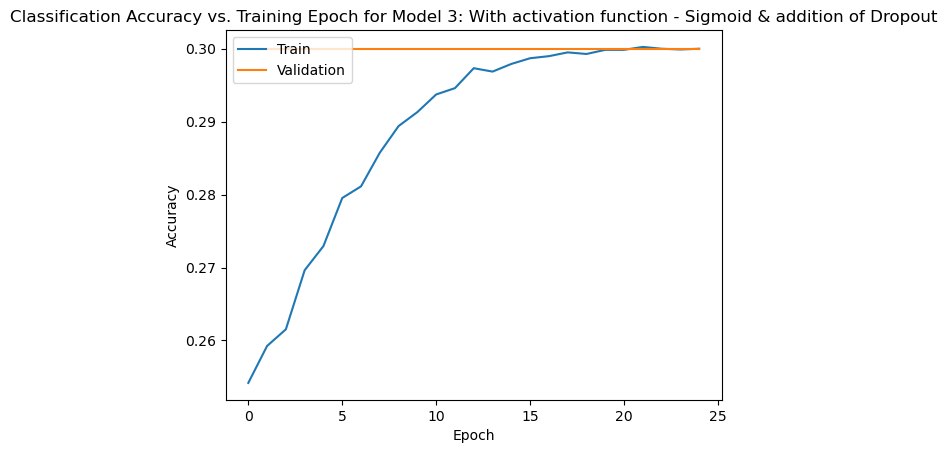

<Figure size 640x480 with 0 Axes>

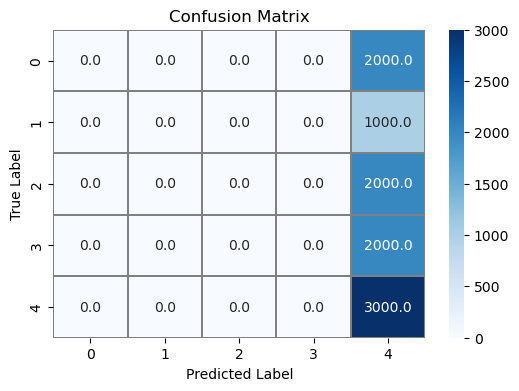

<Figure size 600x300 with 0 Axes>

With activation function - tanh & addition of Dropout
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_282 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 conv2d_283 (Conv2D)         (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_137 (MaxPooli  (None, 12, 12, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_284 (Conv2D)         (None, 10, 10, 128)       73856     
                                                                 
 conv2d_285 (Conv2D)         (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_138 (MaxPooli  (None, 4, 4, 128)        0         

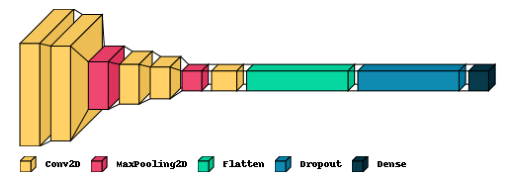

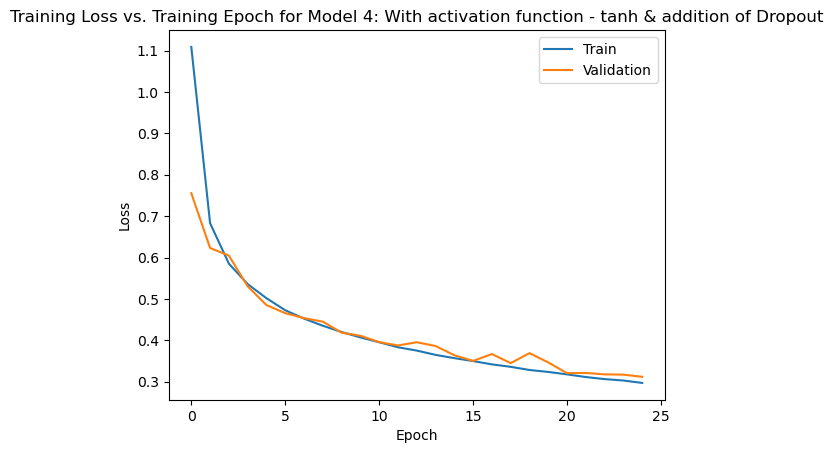

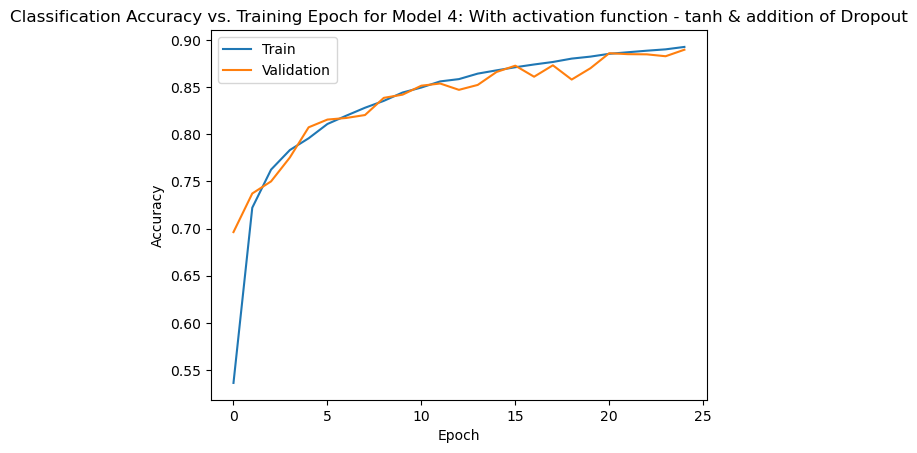

<Figure size 640x480 with 0 Axes>

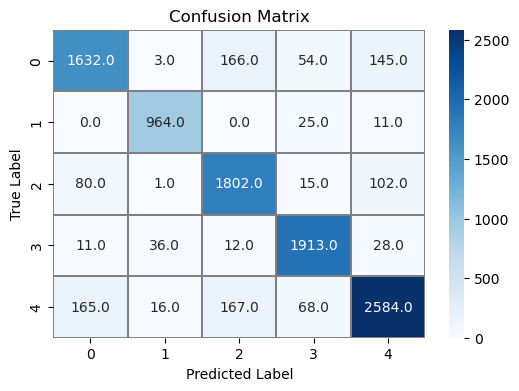

<Figure size 600x300 with 0 Axes>

With activation function - tanh & using Adam optimizer
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_287 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 conv2d_288 (Conv2D)         (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_139 (MaxPooli  (None, 12, 12, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_289 (Conv2D)         (None, 10, 10, 128)       73856     
                                                                 
 conv2d_290 (Conv2D)         (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_140 (MaxPooli  (None, 4, 4, 128)        0        

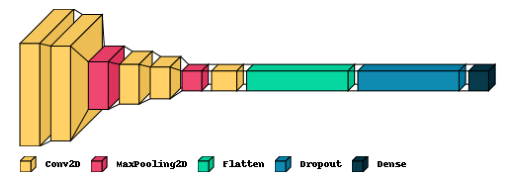

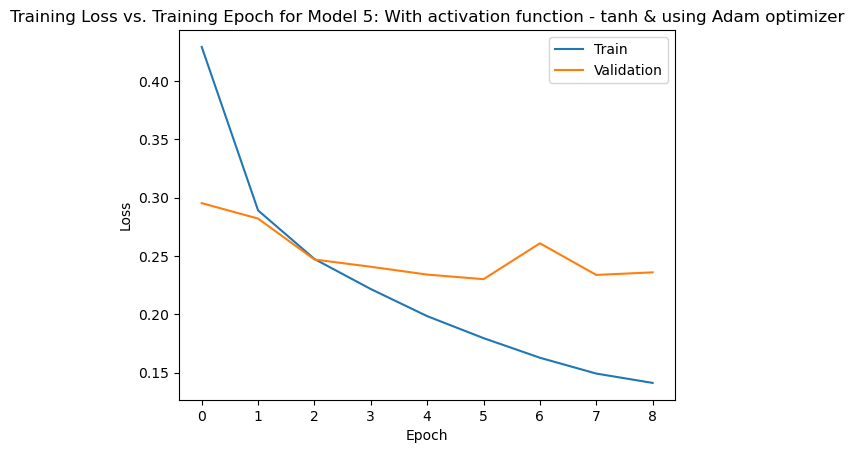

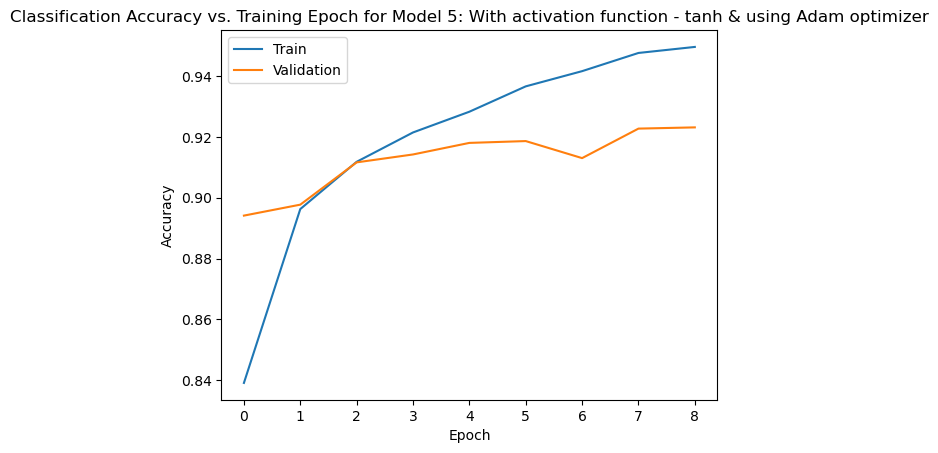

<Figure size 640x480 with 0 Axes>

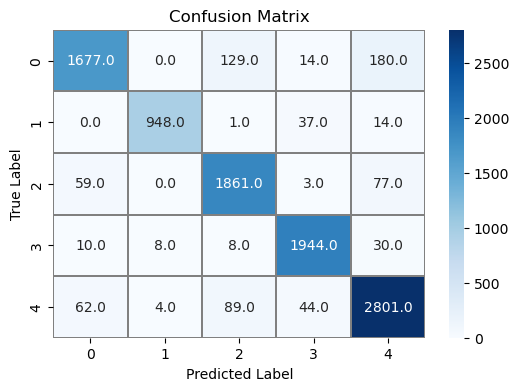

<Figure size 600x300 with 0 Axes>

With activation function - LeakyReLU & using Adam optimizer
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_292 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 conv2d_293 (Conv2D)         (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_141 (MaxPooli  (None, 12, 12, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_294 (Conv2D)         (None, 10, 10, 128)       73856     
                                                                 
 conv2d_295 (Conv2D)         (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_142 (MaxPooli  (None, 4, 4, 128)        0   

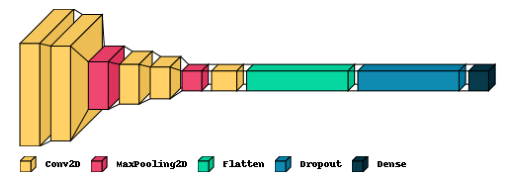

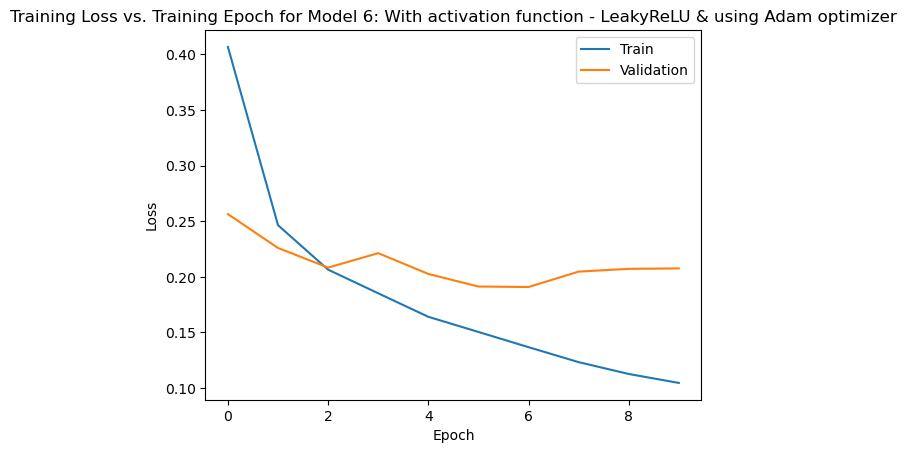

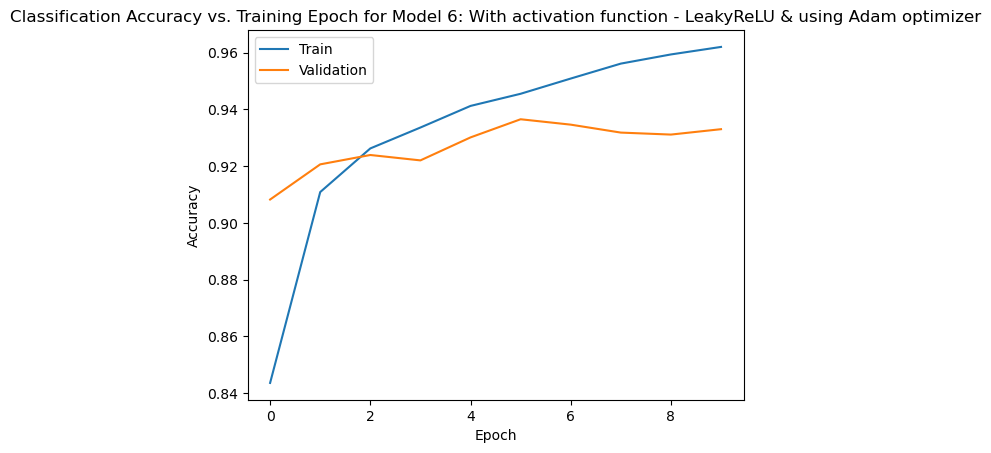

<Figure size 640x480 with 0 Axes>

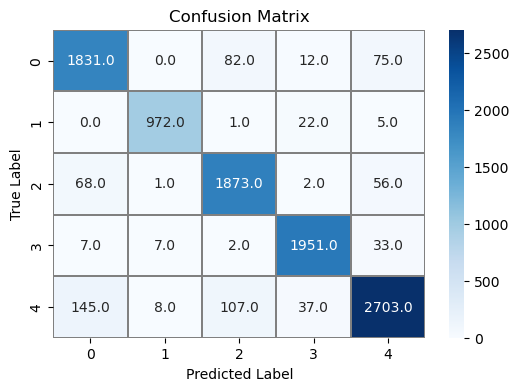

<Figure size 600x300 with 0 Axes>

With activation function - LeakyReLU & variation of kernel size
Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_297 (Conv2D)         (None, 27, 27, 64)        320       
                                                                 
 conv2d_298 (Conv2D)         (None, 26, 26, 64)        16448     
                                                                 
 max_pooling2d_143 (MaxPooli  (None, 13, 13, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_299 (Conv2D)         (None, 12, 12, 128)       32896     
                                                                 
 conv2d_300 (Conv2D)         (None, 11, 11, 128)       65664     
                                                                 
 max_pooling2d_144 (MaxPooli  (None, 5, 5, 128)        

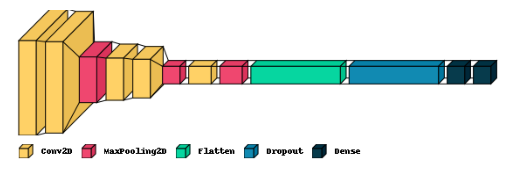

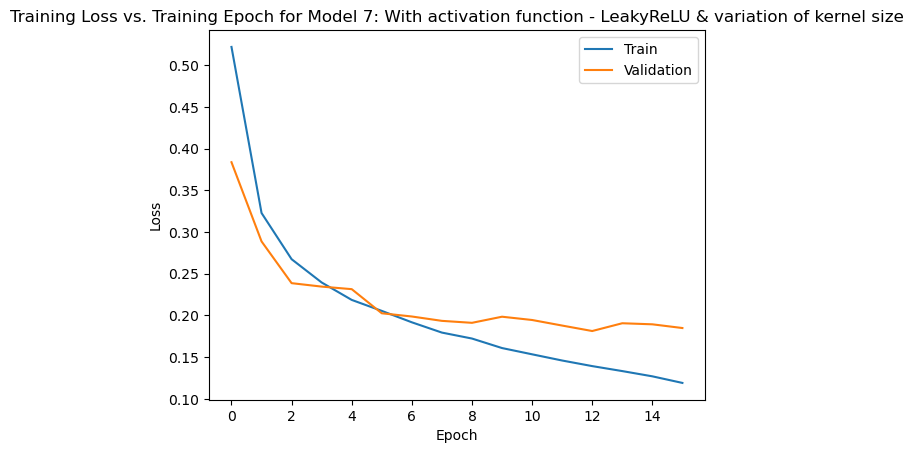

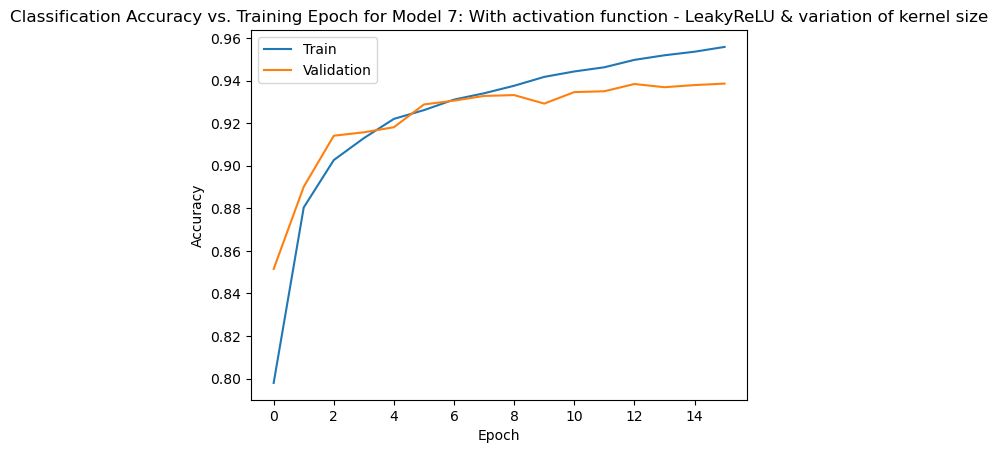

<Figure size 640x480 with 0 Axes>

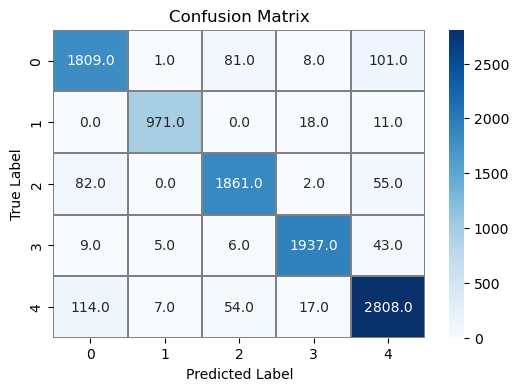

<Figure size 600x300 with 0 Axes>

With activation function - LeakyReLU & variation of kernel size & addition of EarlyStopping
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_302 (Conv2D)         (None, 27, 27, 128)       640       
                                                                 
 conv2d_303 (Conv2D)         (None, 26, 26, 128)       65664     
                                                                 
 max_pooling2d_146 (MaxPooli  (None, 13, 13, 128)      0         
 ng2D)                                                           
                                                                 
 conv2d_304 (Conv2D)         (None, 12, 12, 256)       131328    
                                                                 
 conv2d_305 (Conv2D)         (None, 11, 11, 256)       262400    
                                                                 
 max_pooling2d_147 (MaxPool

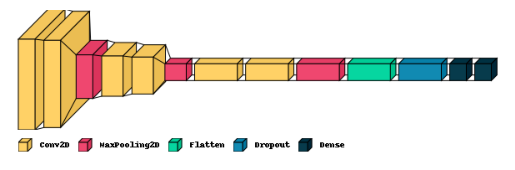

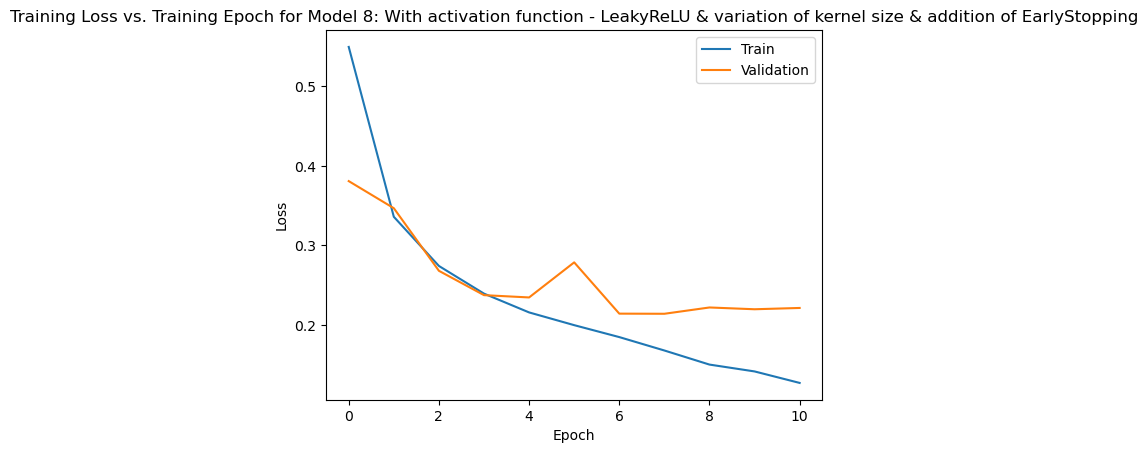

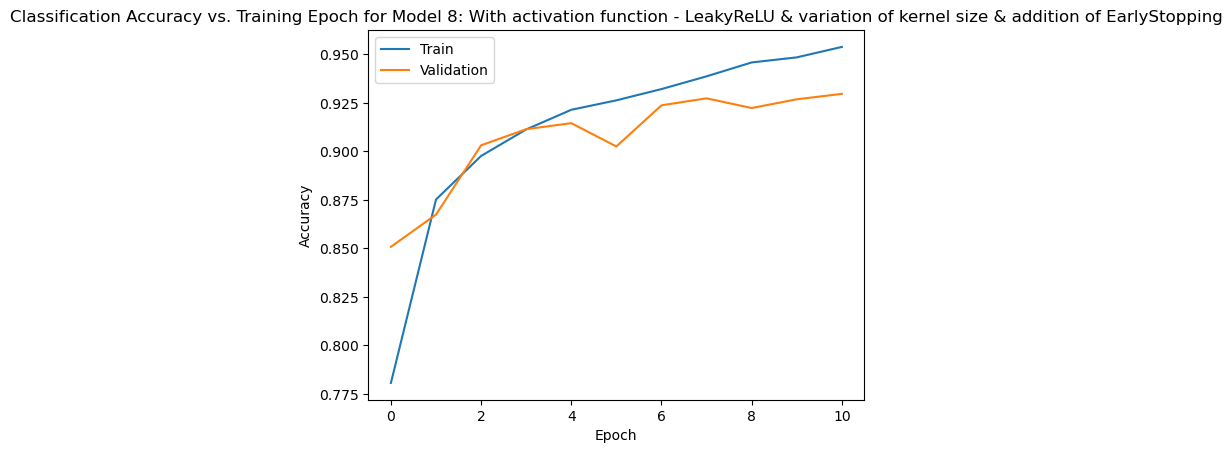

<Figure size 640x480 with 0 Axes>

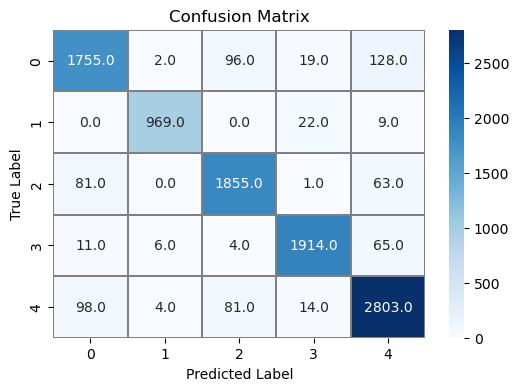

<Figure size 600x300 with 0 Axes>

Multiple activation functions - relu, LeakyReLU & tanh
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_308 (Conv2D)         (None, 27, 27, 128)       640       
                                                                 
 conv2d_309 (Conv2D)         (None, 26, 26, 128)       65664     
                                                                 
 max_pooling2d_149 (MaxPooli  (None, 13, 13, 128)      0         
 ng2D)                                                           
                                                                 
 conv2d_310 (Conv2D)         (None, 12, 12, 256)       131328    
                                                                 
 conv2d_311 (Conv2D)         (None, 11, 11, 256)       262400    
                                                                 
 max_pooling2d_150 (MaxPooli  (None, 5, 5, 256)        0        

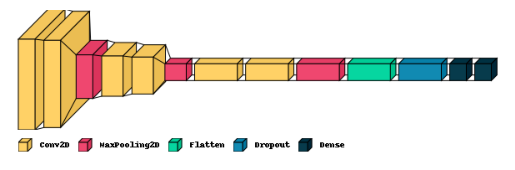

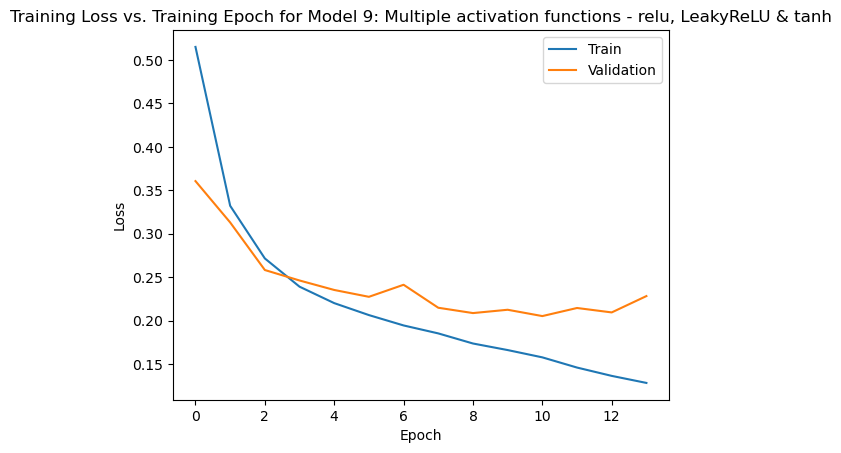

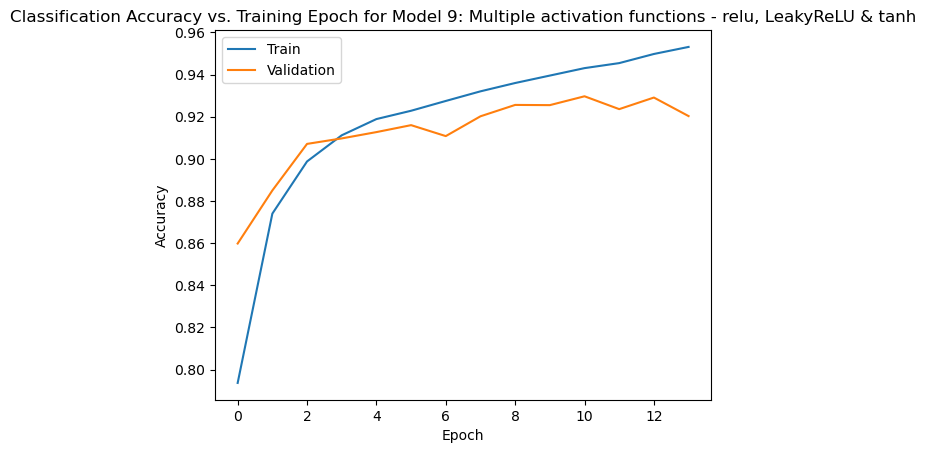

<Figure size 640x480 with 0 Axes>

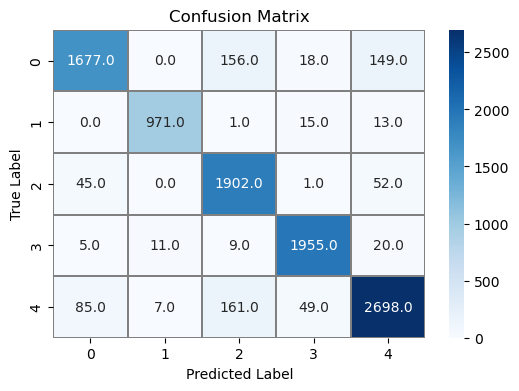

<Figure size 600x300 with 0 Axes>

With activation function - LeakyReLU & varying the order of layers
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_314 (Conv2D)         (None, 27, 27, 128)       640       
                                                                 
 conv2d_315 (Conv2D)         (None, 26, 26, 128)       65664     
                                                                 
 conv2d_316 (Conv2D)         (None, 25, 25, 256)       131328    
                                                                 
 conv2d_317 (Conv2D)         (None, 24, 24, 256)       262400    
                                                                 
 max_pooling2d_152 (MaxPooli  (None, 12, 12, 256)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_153 (MaxPooli  (None, 6, 6, 256)     

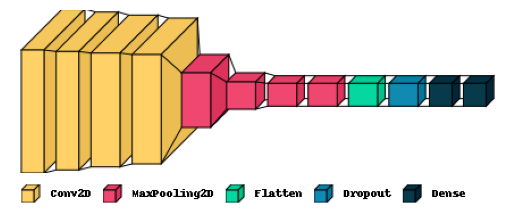

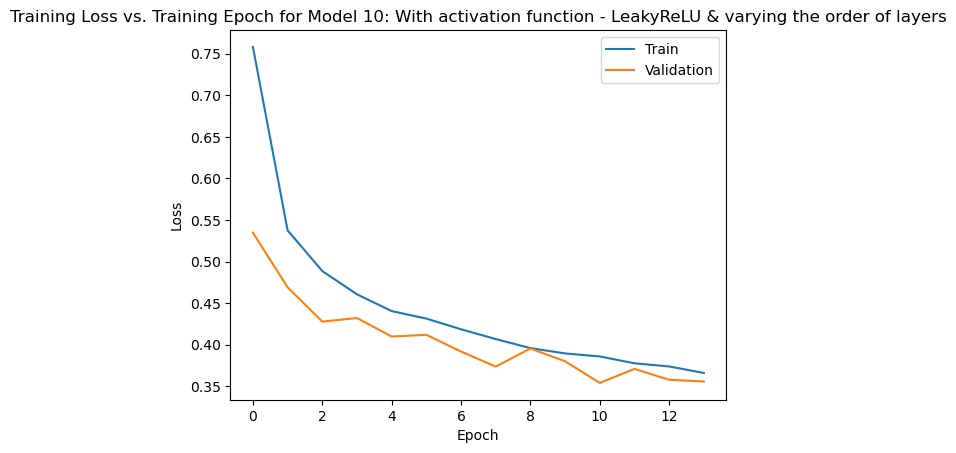

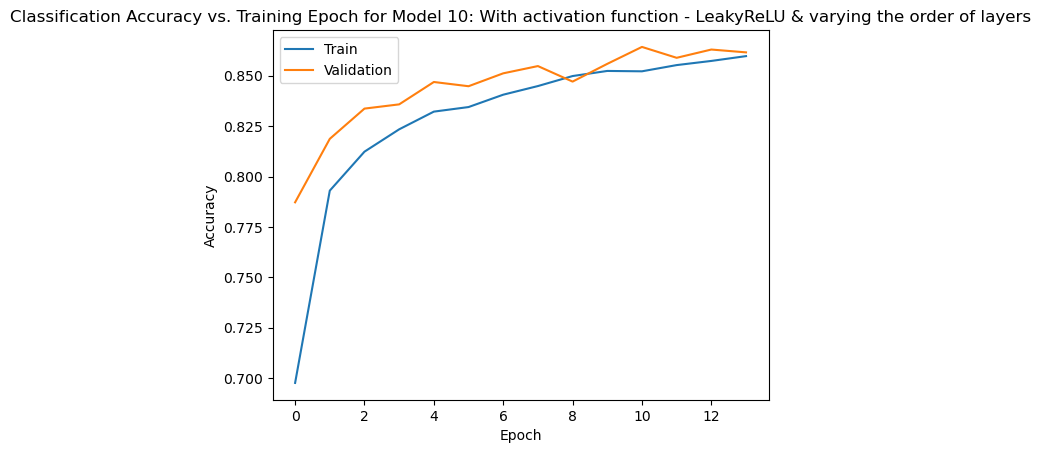

<Figure size 640x480 with 0 Axes>

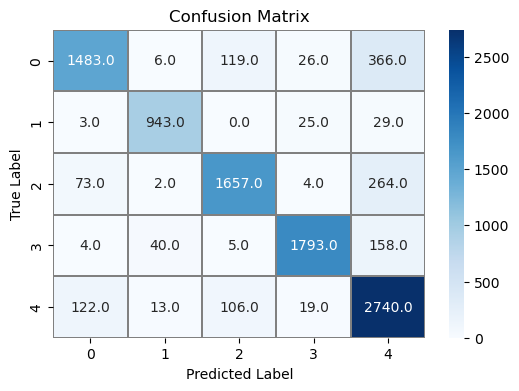

<Figure size 600x300 with 0 Axes>

In [152]:
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
desc = ['Variation of filters & addition of layers', 'With activation function - LeakyReLU & addition of Dropout', 
        'With activation function - Sigmoid & addition of Dropout', 'With activation function - tanh & addition of Dropout',
        'With activation function - tanh & using Adam optimizer', 'With activation function - LeakyReLU & using Adam optimizer',
        'With activation function - LeakyReLU & variation of kernel size', 'With activation function - LeakyReLU & variation of kernel size & addition of EarlyStopping',
        'Multiple activation functions - relu, LeakyReLU & tanh', 'With activation function - LeakyReLU & varying the order of layers']
train_time = []
test_time = []
model_accuracies = []
i=0
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
for model in models:
    i+=1
    print(desc[i-1])
    print(model.summary())
    plt.figure()    
    plt.imshow(visualkeras.layered_view(model, legend=True))
    plt.axis('off')
    if(i>4):
        model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    else:
        model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=25, batch_size=128, 
                validation_data=(x_test, y_test), callbacks=[early_stopping]) if i>4 else model.fit(x_train, y_train, 
                                                                                                    epochs=25, validation_data=(x_test, y_test), batch_size=256)
    
    end_time = time.time()
    train_time.append(end_time-start_time)
    
    plt.figure()
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Training Loss vs. Training Epoch for Model ' + str(i) + ': ' + desc[i-1])
    plt.legend(loc='upper right')
    
    plt.figure()
    plt.plot(history.history['accuracy'], label='Train') 
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Classification Accuracy vs. Training Epoch for Model ' + str(i) + ': ' + desc[i-1])
    plt.legend(loc='upper left')
    
    start_time = time.time()
    model_accuracies.append(model.evaluate(x_test, y_test)[1])
    print('Model Accuracy on Test Data: ', model_accuracies)
    end_time = time.time()
    test_time.append(end_time-start_time)
    
    # Predict the values from the validation dataset
    y_pred = np.argmax(model.predict(x_test), axis=-1)
    print(classification_report(y_test, y_pred))
    
    # plot the confusion matrix
    plt.figure()
    f,ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.figure(figsize=(6,3))
    plt.show()

In [153]:
print(train_time)
print(test_time)
print(model_accuracies)

[85.3193244934082, 93.16081047058105, 92.90855646133423, 93.35188364982605, 43.535600900650024, 47.77516579627991, 85.31980657577515, 125.96556425094604, 153.17314910888672, 276.27913451194763]
[1.3684496879577637, 1.3586885929107666, 1.0577898025512695, 1.3592143058776855, 1.0823118686676025, 1.4011592864990234, 1.1189374923706055, 1.6182947158813477, 1.4890236854553223, 2.6400949954986572]
[0.8762000203132629, 0.8585000038146973, 0.30000001192092896, 0.8895000219345093, 0.9230999946594238, 0.9330000281333923, 0.9386000037193298, 0.9296000003814697, 0.9203000068664551, 0.8615999817848206]


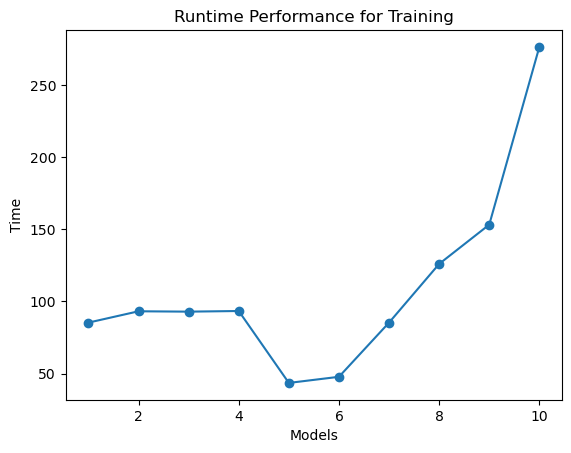

<Figure size 1000x600 with 0 Axes>

In [154]:
plt.figure()
plt.plot(np.arange(1,11,1), train_time, marker='o')
plt.xlabel("Models")
plt.ylabel("Time")
plt.title("Runtime Performance for Training")
plt.figure(figsize=(10,6))
plt.show()

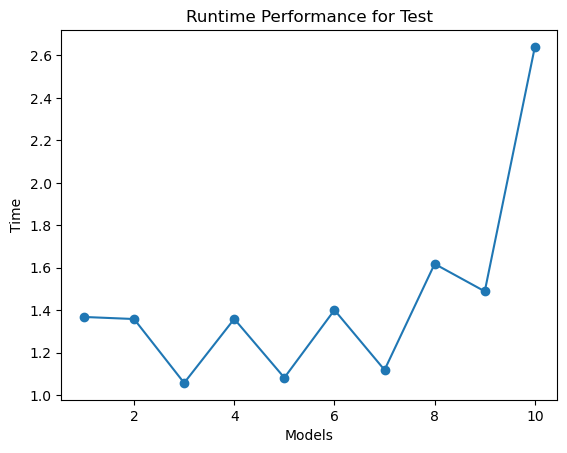

<Figure size 1000x600 with 0 Axes>

In [155]:
plt.figure()
plt.plot(np.arange(1,11,1), test_time, marker='o')
plt.xlabel("Models")
plt.ylabel("Time")
plt.title("Runtime Performance for Test")
plt.figure(figsize=(10,6))
plt.show()

        Model_Accuracy
Mod 1           0.8762
Mod 2           0.8585
Mod 3           0.3000
Mod 4           0.8895
Mod 5           0.9231
Mod 6           0.9330
Mod 7           0.9386
Mod 8           0.9296
Mod 9           0.9203
Mod 10          0.8616


<AxesSubplot:>

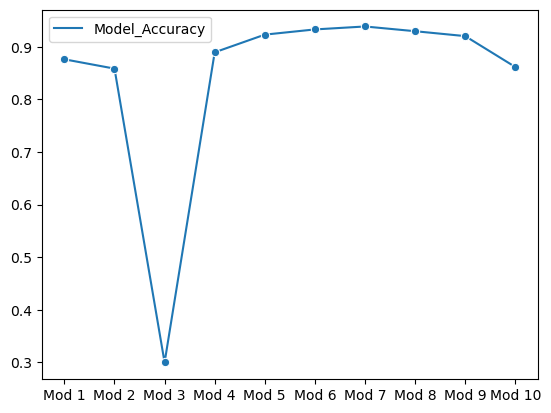

In [156]:
import pandas as pd
data = {'Model_Accuracy': model_accuracies}

df = pd.DataFrame(data)
new_index = {0: 'Mod 1', 1: 'Mod 2', 2: 'Mod 3', 3: 'Mod 4', 4: 'Mod 5',
            5: 'Mod 6',6: 'Mod 7',7: 'Mod 8',8: 'Mod 9',9: 'Mod 10'}
df = df.rename(index=new_index)
print(df)
sns.lineplot(data = df,marker = 'o')

In [157]:
max_values = df.max()
max_acc_index = df['Model_Accuracy'].idxmax()


print(f"The Efficient Model with Maximum Accuracy when comparing with all 10 models is {max_acc_index} at accuracy {max_values['Model_Accuracy']}")

The Efficient Model with Maximum Accuracy when comparing with all 10 models is Mod 7 at accuracy 0.9386000037193298


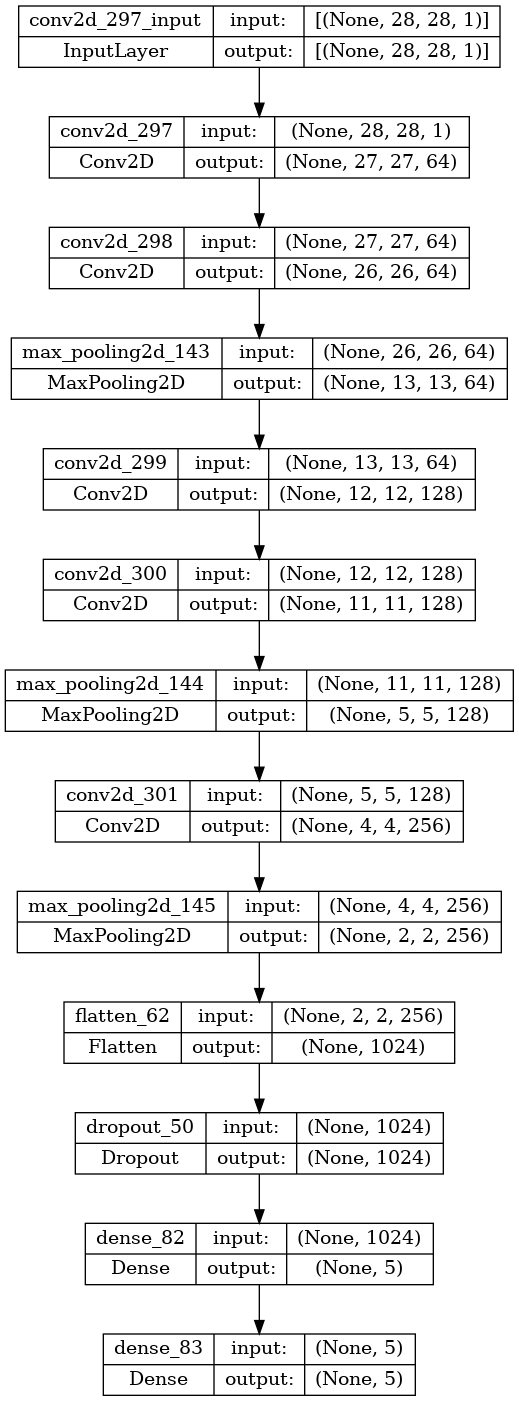

In [158]:
dot_img_file = '/tmp/model_7.png'
tf.keras.utils.plot_model(model7, to_file=dot_img_file, show_shapes=True)

# Q4: Using Your Own Encoding - We used Model 7, last layer (Best Accuracy)

### Extracting train and test encoding from trained network (model7)

In [160]:
intermediate_layer_model = tf.keras.models.Model(inputs=model7.input,
                                                 outputs=model7.get_layer('dense_82').output)


# Extract the intermediate layer output for the training and test sets
train_encoding = intermediate_layer_model.predict(x_train)
test_encoding = intermediate_layer_model.predict(x_test)
print(train_encoding.shape)
print(test_encoding.shape)

313/313 [==============================] - 1s 2ms/step
(60000, 5)
(10000, 5)


### PCA - Visualizing encoding with the first two components

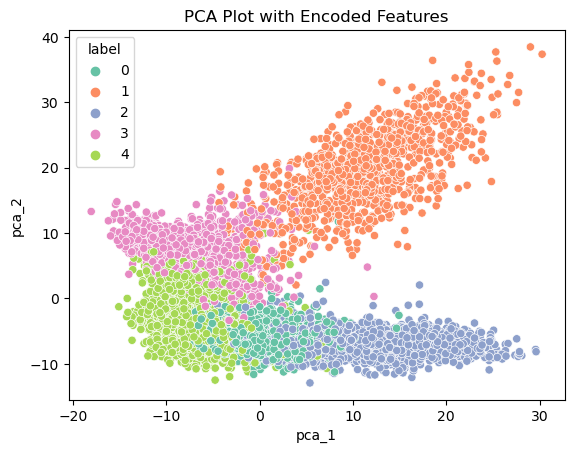

In [161]:
# fit PCA on encoded features
pca = PCA(n_components=2)
encoded_features_pca = pca.fit_transform(test_encoding)

# create dataframe for PCA plot
pca_df = pd.DataFrame(encoded_features_pca, columns=['pca_1', 'pca_2'])
pca_df['label'] = y_test

# plot PCA plot
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_df, palette='Set2')
plt.title('PCA Plot with Encoded Features')
plt.show()

### DBSCAN - Clustering and Visualization

In [162]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=30)
dbscan_labels = dbscan.fit_predict(test_encoding)
dbscan_labels

array([-1, -1,  0, ...,  1,  0, -1])

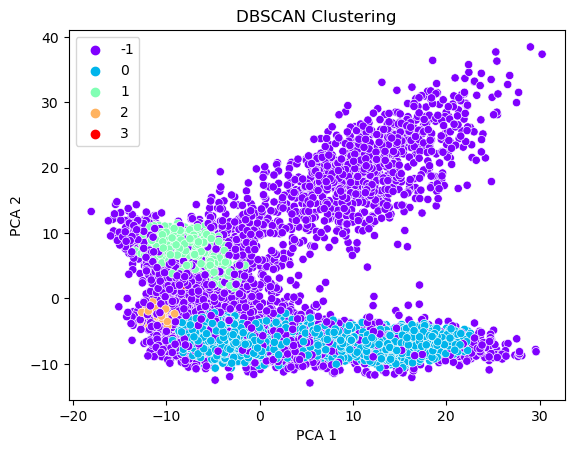

In [163]:
sns.scatterplot(x=encoded_features_pca[:,0], y=encoded_features_pca[:,1], hue=dbscan_labels, palette='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

### K-means - Clustering and Visualization

In [164]:
from sklearn.cluster import KMeans
# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(test_encoding)
kmeans_labels

array([4, 2, 2, ..., 1, 2, 3], dtype=int32)

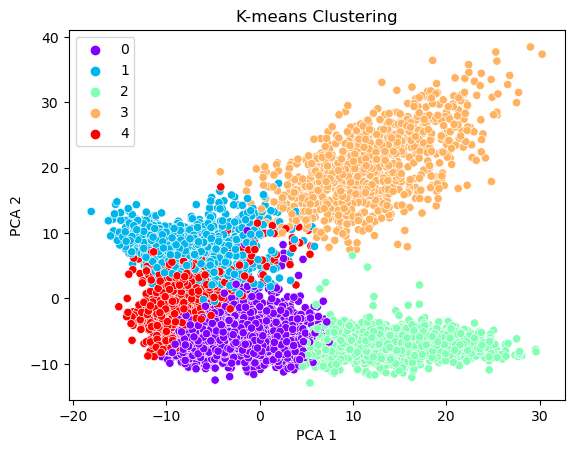

In [165]:
sns.scatterplot(x=encoded_features_pca[:,0], y=encoded_features_pca[:,1], hue=kmeans_labels, palette='rainbow')
plt.title('K-means Clustering')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

### Visualization using t-SNE

<AxesSubplot:title={'center':'TSNE'}, xlabel='tsne_1', ylabel='tsne_2'>

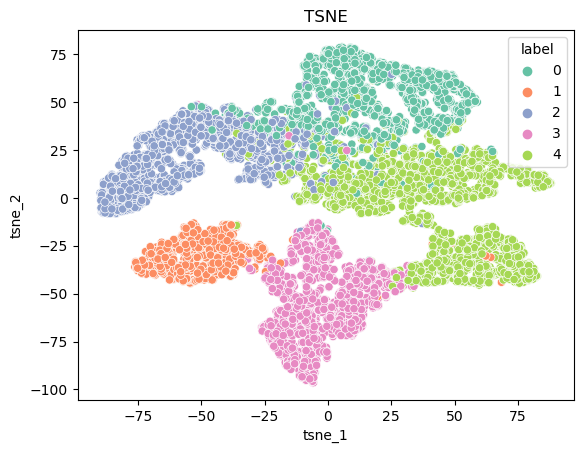

In [166]:
from sklearn.manifold import TSNE

tsne_train = TSNE(n_components=2,random_state=0)
tsne_results = tsne_train.fit_transform(test_encoding)

tsne_df = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])
tsne_df['label'] = y_test
plt.title("TSNE")

sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_df, palette='Set2')

### Visualization using ISOMAP

<AxesSubplot:title={'center':'Isomap'}, xlabel='isomap_1', ylabel='isomap_2'>

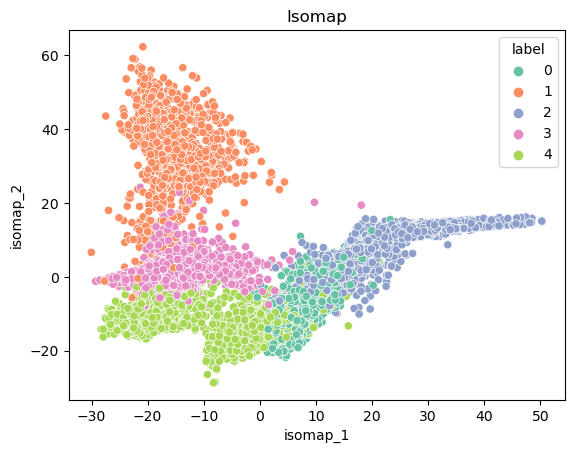

In [167]:
from sklearn.manifold import Isomap

isomap_train = Isomap(n_components=2)
isomap_results = isomap_train.fit_transform(test_encoding)

isomap_df = pd.DataFrame(isomap_results, columns=['isomap_1', 'isomap_2'])
isomap_df['label'] = y_test
plt.title("Isomap")

sns.scatterplot(x='isomap_1', y='isomap_2', hue='label', data=isomap_df, palette='Set2')

### Mystery Label Identification

In [168]:
y_test_myslabels = kmeans.labels_
y_test_myslabels.shape

(10000,)

In [170]:
x_test_mys = x_test
x_test_mys = x_test_mys.reshape((-1,28,28))

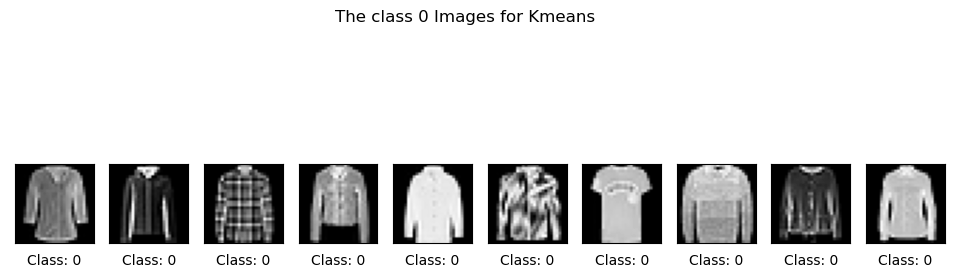

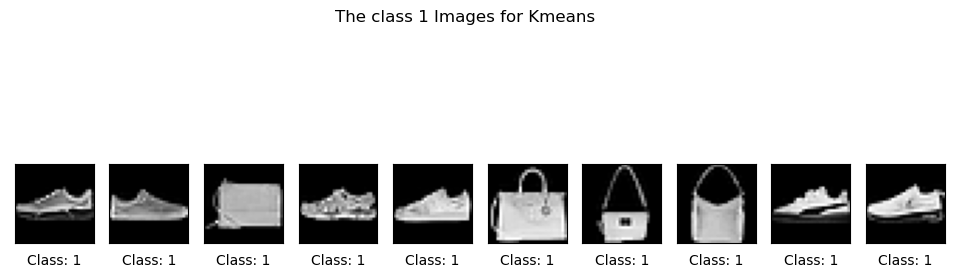

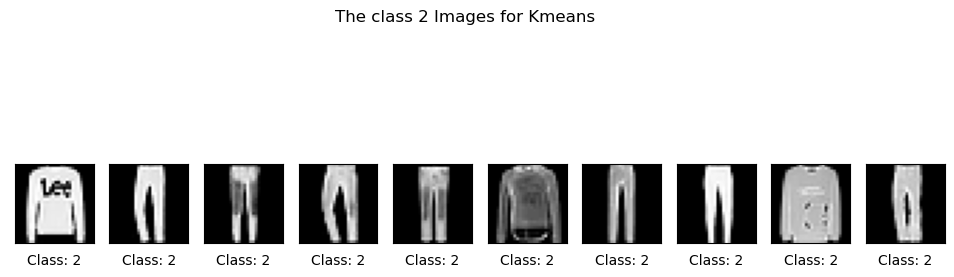

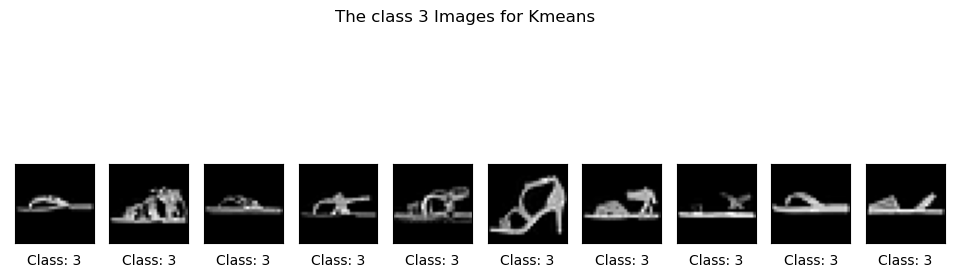

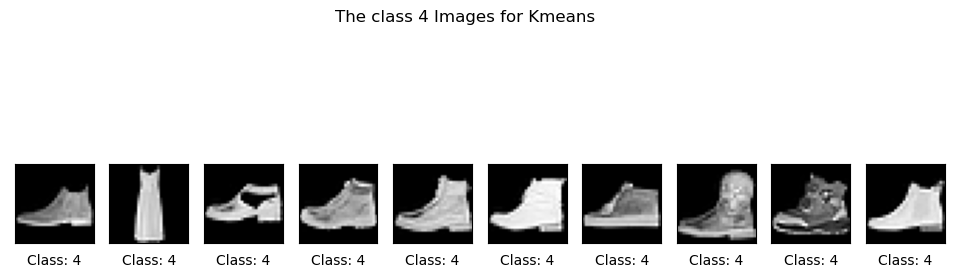

In [171]:
x_test_mys = x_test_mys.reshape((-1,28,28))
for i in range(5):
    x_class = np.array(x_test_mys[y_test_myslabels == i])
    fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
    for j in range(10):
        ax[j].set_xticks([])
        ax[j].set_yticks([])
        ax[j].set_xlabel('Class: ' + str(i))
        ax[j].imshow(x_class[j],cmap='gray')
        
    
    fig.suptitle('The class '+ str(i) +' Images for Kmeans')
    plt.show()

### Class 0 - Shoes and Bags
### Class 1 - Casual shirts, T-shirts and Skirts
### Class 2 - Lounge Pants and Sweatshirts
### Class 3 - Sandals and Flip-flops
### Class 4 - Boots and Formal wear

## Using this encoding in a creative way

### AutoEncoders
We used our encoding as input to Autoencoder network

In [172]:
# Define autoencoder model
input_shape = train_encoding.shape[1]
inputs = Input(shape=(input_shape,))
encoder = Dense(1024, activation='LeakyReLU')(inputs)
encoder = Dense(512, activation='LeakyReLU')(encoder)
encoder = Dense(256, activation='LeakyReLU')(encoder)
encoded = Dense(128, activation='LeakyReLU')(encoder)
decoder = Dense(256, activation='LeakyReLU')(encoded)
decoder = Dense(512, activation='LeakyReLU')(decoder)
decoder = Dense(1024, activation='LeakyReLU')(decoder)
decoded = Dense(input_shape, activation='LeakyReLU')(decoder)
autoencoder = Model(inputs=inputs, outputs=decoded)

# Add dropout layers
dropout_rate = 0.2
encoder = Dropout(dropout_rate)(encoder)
decoder = Dropout(dropout_rate)(decoder)

# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train autoencoder model with early stopping
autoencoder.fit(train_encoding, train_encoding, epochs=20, batch_size=128, 
                validation_data=(test_encoding, test_encoding), 
                callbacks=[early_stopping])

Epoch 1/20
469/469 [==============================] - 5s 5ms/step - loss: 0.7748 - accuracy: 0.9826 - val_loss: 0.0275 - val_accuracy: 0.9941
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0403 - accuracy: 0.9925 - val_loss: 0.0156 - val_accuracy: 0.9931
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0552 - accuracy: 0.9913 - val_loss: 0.0798 - val_accuracy: 0.9888
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1497 - accuracy: 0.9889 - val_loss: 0.0099 - val_accuracy: 0.9939
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0049 - accuracy: 0.9968 - val_loss: 0.0080 - val_accuracy: 0.9971
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0178 - accuracy: 0.9955 - val_loss: 0.0137 - val_accuracy: 0.9933
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0394 - val_accuracy: 0.9853
Epoch 

In [173]:
train_auto_encoding = autoencoder.predict(train_encoding)
test_auto_encoding = autoencoder.predict(test_encoding)
print(train_auto_encoding.shape)
print(test_auto_encoding.shape)

313/313 [==============================] - 1s 2ms/step
(60000, 5)
(10000, 5)


### SVM
We are classifying the autoender results using Support Vector Machine (SVM)

In [174]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_auto_encoding, y_train)
y_pred = clf.predict(test_auto_encoding)
y_pred

array([4, 2, 2, ..., 3, 2, 1])

In [175]:
from sklearn.metrics import accuracy_score
# Evaluate accuracy
test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy:', test_acc)

Test Accuracy: 0.9406


### Mystery Label Identification with SVM Classifier

In [176]:
y_test_svm = y_pred
y_test_svm.shape

(10000,)

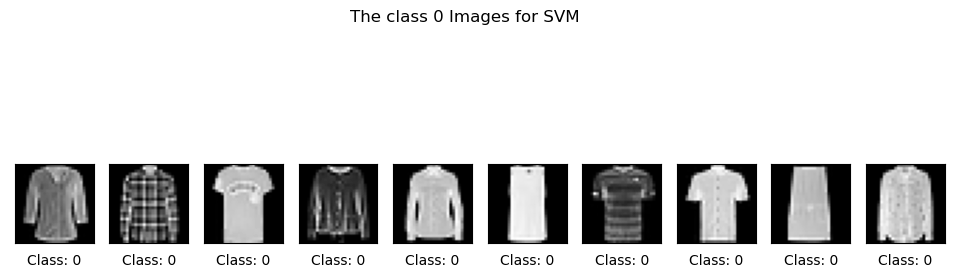

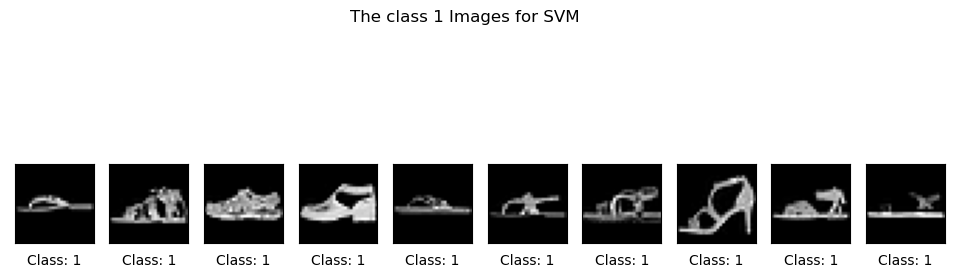

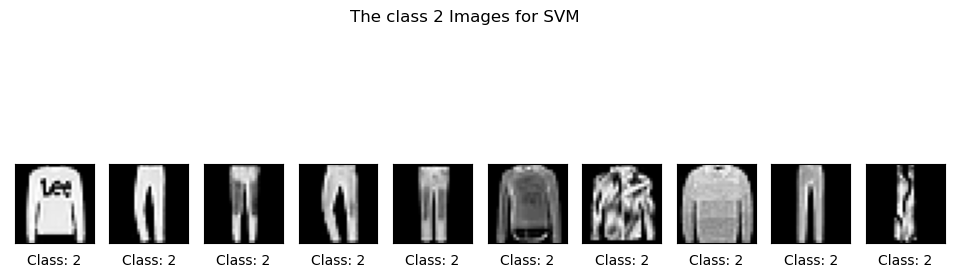

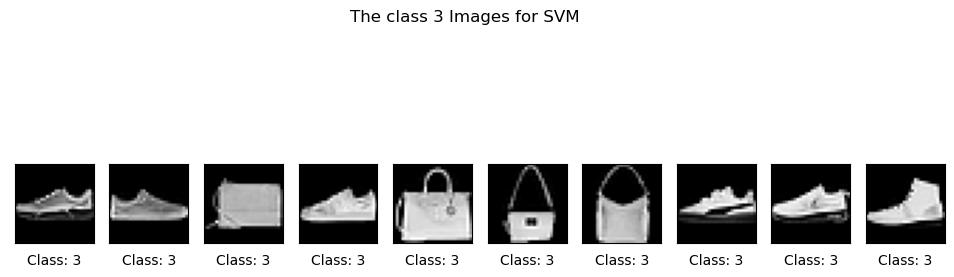

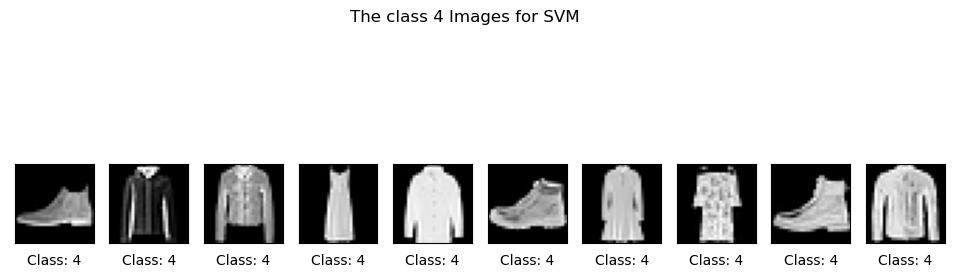

In [177]:
x_test_mys = x_test_mys.reshape((-1,28,28))
for i in range(5):
    x_class = np.array(x_test_mys[y_test_svm == i])
    fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
    for j in range(10):
        ax[j].set_xticks([])
        ax[j].set_yticks([])
        ax[j].set_xlabel('Class: ' + str(i))
        ax[j].imshow(x_class[j],cmap='gray')
        
    
    fig.suptitle('The class '+ str(i) +' Images for SVM')
    plt.show()

### Class 0 - Casual shirts, T-shirts and Skirts
### Class 1 - Sandals and Flip-flops
### Class 2 - Lounge Pants and Sweatshirts
### Class 3 - Shoes and Bags
### Class 4 - Boots and Formal wear